In [1]:
# 1. Imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 2. Read CSV 
df_raw = pd.read_csv("Sales Dataset.csv", low_memory=False)
display(df_raw.head())

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [6]:
df_raw.dtypes

Order ID        object
Amount           int64
Profit           int64
Quantity         int64
Category        object
Sub-Category    object
PaymentMode     object
Order Date      object
CustomerName    object
State           object
City            object
Year-Month      object
dtype: object

In [7]:
# Convert column names to snake_case
df_raw.columns = (
    df_raw.columns
    .str.strip()                 
    .str.lower()                 
    .str.replace(' ', '_')       
    .str.replace('-', '_')       
)


In [8]:
df_raw.dtypes

order_id        object
amount           int64
profit           int64
quantity         int64
category        object
sub_category    object
paymentmode     object
order_date      object
customername    object
state           object
city            object
year_month      object
dtype: object

In [9]:
# rename selected culumns 
df_raw = df_raw.rename(columns={
    "paymentmode": "payment_mode",
    "customername": "customer_name"
})


In [10]:
# Convert to datetime
df_raw['order_date'] = pd.to_datetime(df_raw['order_date'], errors='coerce')

# Convert year-month depending on format
df_raw['year_month'] = pd.to_datetime(df_raw['year_month'], format="%Y-%m", errors='coerce')


In [11]:
df_raw.dtypes

order_id                 object
amount                    int64
profit                    int64
quantity                  int64
category                 object
sub_category             object
payment_mode             object
order_date       datetime64[ns]
customer_name            object
state                    object
city                     object
year_month       datetime64[ns]
dtype: object

In [12]:
conn = sqlite3.connect("sales_data.db")


In [15]:
# Store cleaned dataframe into SQLite DB
df_raw.to_sql("sales", conn, if_exists="replace", index=False)


1194

In [16]:
query = """
SELECT 
    Category,
    SUM(Quantity) AS total_quantity,
    SUM(Amount) AS total_revenue,
    SUM(Profit) AS total_profit
FROM sales
GROUP BY Category
"""


In [17]:
df_result = pd.read_sql_query(query, conn)
print(df_result)



          category  total_quantity  total_revenue  total_profit
0      Electronics            4258        2054456        518580
1        Furniture            4441        2038673        540542
2  Office Supplies            4046        2089510        551575


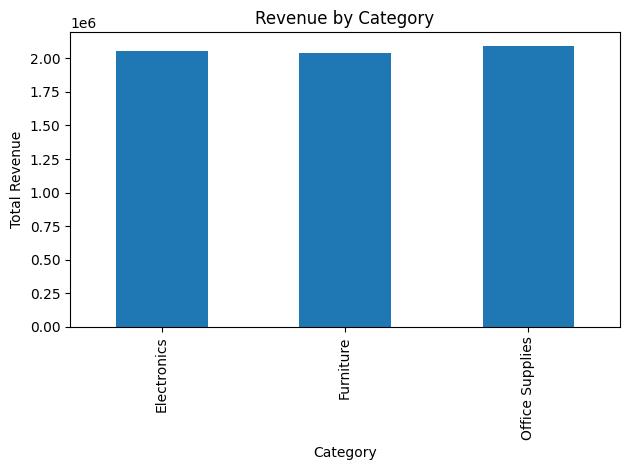

In [25]:
df_result.plot(kind='bar', x='category', y='total_revenue', legend=False)
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()
